**Вопрос 1**

Имеется файл https://yadi.sk/i/IxBCaRP83Kz8dj с временной статистикой работы асессоров над однотипным заданием.

Формат файла: login tid Microtasks assigned_ts tclosed_ts. Пояснение к формату: 
- **login** — логин асессора; 
- **tid** — id оцениваемого задания (task id); 
- **Microtasks** – количество микрозаданий в одном задании; 
- **assigned_ts** — время резервирования системой задания для асессора; 
- **closed_ts** — точное время завершения работы над заданием; разделитель — табуляция \t.

Задание может состоять из одного или несколько микрозаданий. Время резервирования задания (assigned_ts) указывает на тот момент, когда система назначила определенного асессора исполнителем этого задания. Этот момент может совпадать с временем начала работы асессора над заданием, а может и не совпадать (асессор может отойти выпить чаю, а потом приступить к заданию, асессор может выполнять предыдущее задание, в то время как за ним зарезервированы новые).

Предположим, что асессор за 30 секунд своего рабочего времени получает N рублей.

Какую оплату вы считаете справедливой для выполнения асессором одного микрозадания из этого файла? Опишите подробно все этапы вашего решения.

### Проработка: 

#### Идея
- рассчитать среднее значение времени на выполнение одной микрозадачи 
- исходя из полученного не предыдущем шаге среднего значения, рассчитать количество микрозадач, которые может выполнить асессор в режиме работы 5/8. В расчетах использовать допущение, что асессор на выполнение работы тратит 80% от всего рабочего времени. 
- в качестве допущения, взять среднюю заработную плату в размере **30 0000 рублей** и разделить ее на количество микрозадач, которые может выполняит асессор в месяц
- получим стоимсть выполнения одной микрозадачи. **done**

#### Работа с данными
1. Определить и удалить ложные данные в датасете
2. Посмотреть наличие выбросов и попытаться их устранить, для работы с более значимыми данными

#### Рассчеты
1. Высчитать время выполнения всего задания. **Цель:** возможность для среднего времени выполнения одной микрозадачи.**
2. Посчитать среднее время на выполнение одной микрозадачи. **Цель:** для оперирования в последующих расчетах средним временем на выполнения микрозадачи и в последствии выйти на приемлемую оплату
3. (~) Определить сколько временных слотов по 30 сек. требуется для выполнения одной микрозадачи. **Цель:** получение коэфициента стоимости работ асессора за выполнения средней велечины выполнения одной микрозадачи, исходя из тарифа в N рублей за 30 секунд.
4. Рассчитать медианный показатель (медиана сгладит негативный эффект "грязного" времени выполнения микрозадачи) выполнения одной микрозадачи, сгруппированных по месяцам. Цель: получить 


In [1]:
import pandas as pd
from datetime import datetime, timedelta

In [2]:
import requests
from urllib.parse import urlencode

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://yadi.sk/i/IxBCaRP83Kz8dj'  # Сюда вписываете вашу ссылку

# Получаем загрузочную ссылку
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
download_url

'https://downloader.disk.yandex.ru/disk/8005def7e19591d4ce99e948c809df8e8b8a2ebd572d9804528be236553b399a/5f7605d7/bu92kZqLm5Gkr9yvLBQQ4I6AHYj-Ltsyp_feXYifhcw0wSq6PtNoJYAMAIdyZalbSUFzq3USfP7D_1XF6bRulA%3D%3D?uid=0&filename=data_task4_old.txt&disposition=attachment&hash=TKpkeqTtSkR3GS3SLe56%2BbV1Ms0cpBwIePhPjMDAMi4%3D%3A&limit=0&content_type=text%2Fplain&owner_uid=45647354&fsize=45540847&hid=1a360c0e2a08dceec4f4a4c225706cd9&media_type=document&tknv=v2'

In [4]:

# file = 'data/data_task4_old.txt'
file = download_url
df = pd.read_csv(download_url, sep='\t', nrows=None, parse_dates=['assigned_ts', 'closed_ts'], dayfirst=False)
df.head()

,login,tid,Microtasks,assigned_ts,closed_ts
0,login0,190563850.0,4.0,2017-04-20 12:09:39,2017-04-20 13:13:01
1,login0,190561754.0,1.0,2017-04-20 12:10:30,2017-04-20 12:28:29
2,login0,190565906.0,4.0,2017-04-20 12:21:31,2017-04-20 13:30:10
3,login0,190560246.0,1.0,2017-04-20 12:28:30,2017-04-20 13:13:56
4,login0,190562168.0,2.0,2017-04-20 12:28:42,2017-04-20 13:14:50


In [5]:
indxr = df[df.assigned_ts	>= df.closed_ts]
indxr

,login,tid,Microtasks,assigned_ts,closed_ts
534453,login585,197340894.0,1.0,2017-05-24 16:13:06,2017-05-24 16:00:57


In [6]:
# удаление "ложных" данных
df.drop(indxr.index, inplace=True)

In [7]:
# filter = df.assigned_ts	>= df.closed_ts
df_tmp = df.head().copy()
df_tmp

,login,tid,Microtasks,assigned_ts,closed_ts
0,login0,190563850.0,4.0,2017-04-20 12:09:39,2017-04-20 13:13:01
1,login0,190561754.0,1.0,2017-04-20 12:10:30,2017-04-20 12:28:29
2,login0,190565906.0,4.0,2017-04-20 12:21:31,2017-04-20 13:30:10
3,login0,190560246.0,1.0,2017-04-20 12:28:30,2017-04-20 13:13:56
4,login0,190562168.0,2.0,2017-04-20 12:28:42,2017-04-20 13:14:50


In [8]:
# df_tmp[df_tmp['Microtasks'] < 2].drop(axis=0, inplace=True)
# df_tmp.drop((df_tmp['Microtasks'] < 2), inplace=True)
indxr = df_tmp[df_tmp['Microtasks'] < 2].index
df_tmp.drop(indxr, inplace=True)
df_tmp


,login,tid,Microtasks,assigned_ts,closed_ts
0,login0,190563850.0,4.0,2017-04-20 12:09:39,2017-04-20 13:13:01
2,login0,190565906.0,4.0,2017-04-20 12:21:31,2017-04-20 13:30:10
4,login0,190562168.0,2.0,2017-04-20 12:28:42,2017-04-20 13:14:50


In [9]:
df_tmp['tm_delta_seconds'] = (df_tmp.closed_ts - df_tmp.assigned_ts) / timedelta(seconds=1)
df_tmp['microtasks_per_seconds'] = df_tmp.tm_delta_seconds / df_tmp.Microtasks
df_tmp

,login,tid,Microtasks,assigned_ts,closed_ts,tm_delta_seconds,microtasks_per_seconds
0,login0,190563850.0,4.0,2017-04-20 12:09:39,2017-04-20 13:13:01,3802.0,950.50
2,login0,190565906.0,4.0,2017-04-20 12:21:31,2017-04-20 13:30:10,4119.0,1029.75
4,login0,190562168.0,2.0,2017-04-20 12:28:42,2017-04-20 13:14:50,2768.0,1384.00


In [11]:
# Рассчитаем время на выполнение задачи в секундах
df['tm_delta_seconds'] = (df.closed_ts - df.assigned_ts) / timedelta(seconds=1)

# вычислим время выполнения одной микрозадачи в секундах
df['microtasks_per_seconds'] = df.tm_delta_seconds / df.Microtasks

# разделим весь массив данных на 4 равных по количеству записей, чтобы вычислить эффективность выполнения задач 
# 1 - группа с самым быстрым выполнением задач, последующие группы уменьшают долю на 25%. 
# 0,25 - группа с самыми медленно выполняемыми задачами
df['productivity_rate'] = pd.qcut(df.microtasks_per_seconds, q=4, labels=[1, 0.75, 0.5, 0.25])

# высчитаем сколько временных слотов по 30 секунд выполнялось задание 
df['task_slots'] = (df.tm_delta_seconds / 30)

# высчитаем сколько временных слотов по 30 секунд выполнялось микрозадание 
df['microtask_slots'] = (df.microtasks_per_seconds / 30)

# вычисляем ставку оплаты с учетом коэффициента эффективности выполнения задачи. 
df['price_rate'] = df.microtask_slots * df.productivity_rate.astype('float')

In [12]:
df['productivity_rate'].value_counts()

1.00    177397
0.75    175500
0.25    174959
0.50    173970
Name: productivity_rate, dtype: int64

In [13]:
df.sample(10)

,login,tid,Microtasks,assigned_ts,closed_ts,tm_delta_seconds,microtasks_per_seconds,productivity_rate,task_slots,microtask_slots,price_rate
483008,login525,171273984.0,3.0,2017-05-31 13:14:21,2017-06-01 06:15:50,61289.0,20429.666667,0.25,2042.966667,680.988889,170.247222
663844,login727,192852562.0,12.0,2017-04-30 08:21:43,2017-04-30 09:06:38,2695.0,224.583333,0.25,89.833333,7.486111,1.871528
343291,login360,198165661.0,6.0,2017-05-30 15:28:55,2017-05-30 16:50:08,4873.0,812.166667,0.25,162.433333,27.072222,6.768056
236051,login224,197042680.0,4.0,2017-05-23 10:30:01,2017-05-23 10:31:52,111.0,27.750000,1.00,3.700000,0.925000,0.925000
39501,login28,198375701.0,2.0,2017-06-01 01:56:18,2017-06-01 02:10:18,840.0,420.000000,0.25,28.000000,14.000000,3.500000
252220,login242,197713574.0,1.0,2017-05-26 21:47:41,2017-05-26 21:48:10,29.0,29.000000,1.00,0.966667,0.966667,0.966667
426911,login468,191383230.0,1.0,2017-04-23 16:18:48,2017-04-23 16:19:39,51.0,51.000000,0.75,1.700000,1.700000,1.275000
118491,login111,194747480.0,1.0,2017-05-10 11:51:16,2017-05-10 11:51:56,40.0,40.000000,0.75,1.333333,1.333333,1.000000
276365,login274,198527257.0,1.0,2017-06-01 21:22:00,2017-06-01 21:28:27,387.0,387.000000,0.25,12.900000,12.900000,3.225000
432759,login469,196670632.0,4.0,2017-05-20 15:02:11,2017-05-20 15:04:31,140.0,35.000000,1.00,4.666667,1.166667,1.166667


In [14]:
# df_res = df.groupby(['login']).agg({'Microtasks':'sum', 'price_rate': 'sum'})
df_res = df.groupby(by=[df.assigned_ts.dt.month_name(), 'login']).agg({'Microtasks':'sum', 'price_rate': 'sum'})

In [15]:
df_res['price_per_microtasks'] = df_res.price_rate / df_res.Microtasks 


In [16]:
df_res

Microtasks    price_rate  price_per_microtasks
assigned_ts login                                                   
April       login0         690.0   3369.253750              4.882976
            login10         66.0     93.985556              1.424024
            login100         2.0      3.112500              1.556250
            login101      2465.0   1828.275974              0.741694
            login102        63.0     54.775613              0.869454
...                          ...           ...                   ...
May         login95       3820.0   1195.057328              0.312842
            login96        107.0     49.270556              0.460472
            login97       2019.0  12497.368378              6.189880
            login98       4914.0  16110.634962              3.278517
            login99        482.0    526.494678              1.092313

[1699 rows x 3 columns]

In [17]:
df_res.describe()

,Microtasks,price_rate,price_per_microtasks
count,1699.000000,1699.000000,1699.000000
mean,1344.330783,2209.942798,3.882258
std,2749.333741,6263.516225,11.735627
min,1.000000,0.506667,0.050667
25%,91.500000,146.842212,0.765078
50%,400.000000,674.239732,1.383081
75%,1435.500000,2158.966748,2.891688
max,35368.000000,191410.870107,235.525000


In [18]:
df.describe(include='datetime')

C:\Users\prostov\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
C:\Users\prostov\env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,assigned_ts,closed_ts
count,701826,701826
unique,572819,542996
top,2017-05-17 06:40:36,2017-04-25 16:39:07
freq,17,33
first,2017-04-20 00:00:00,2017-04-20 00:00:52
last,2017-06-01 23:58:27,2017-06-01 23:59:58


In [19]:
df.assigned_ts.dt.month_name().value_counts()

May      496189
April    187610
June      18027
Name: assigned_ts, dtype: int64

In [20]:
df.groupby(by=[df.assigned_ts.dt.month_name(), ]).agg({'Microtasks':'sum', 'price_rate': 'sum'}).assign(price_per_microtasks=lambda x: (x.price_rate / x.Microtasks))

,Microtasks,price_rate,price_per_microtasks
assigned_ts,,,
April,494406.0,7.579559e+05,1.533064
June,50398.0,6.225336e+04,1.235235
May,1739214.0,2.934484e+06,1.687247


In [21]:
df_tmp = df.groupby(by=[df.assigned_ts.dt.month_name(), 'login']).agg({'microtask_slots':'median',})


<AxesSubplot:>

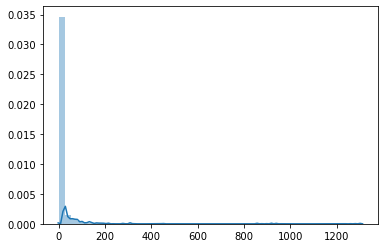

In [23]:
sns.distplot(df_tmp.values)

In [24]:
df_tmp.describe()

,microtask_slots
count,1699.000000
mean,14.338100
std,57.183546
min,0.488889
25%,2.300000
50%,3.900000
75%,7.925000
max,1308.516667


In [25]:
df[df.tm_delta_seconds > (60 * 60 * 8)]

,login,tid,Microtasks,assigned_ts,closed_ts,tm_delta_seconds,microtasks_per_seconds,productivity_rate,task_slots,microtask_slots,price_rate
191,login0,189530764.0,8.0,2017-04-23 17:30:51,2017-04-24 09:43:59,58388.0,7298.500000,0.25,1946.266667,243.283333,60.820833
241,login0,167496148.0,7.0,2017-04-26 09:09:46,2017-04-27 06:55:45,78359.0,11194.142857,0.25,2611.966667,373.138095,93.284524
579,login0,195662434.0,4.0,2017-05-16 13:34:58,2017-05-17 06:25:10,60612.0,15153.000000,0.25,2020.400000,505.100000,126.275000
726,login0,196330832.0,2.0,2017-05-18 13:38:27,2017-05-19 07:14:42,63375.0,31687.500000,0.25,2112.500000,1056.250000,264.062500
731,login0,168847636.0,2.0,2017-05-21 17:57:14,2017-05-22 06:46:56,46182.0,23091.000000,0.25,1539.400000,769.700000,192.425000
...,...,...,...,...,...,...,...,...,...,...,...
701529,login765,169272848.0,6.0,2017-05-25 19:24:41,2017-05-26 16:33:46,76145.0,12690.833333,0.25,2538.166667,423.027778,105.756944
701653,login765,170266988.0,2.0,2017-05-28 23:18:02,2017-05-29 15:34:23,58581.0,29290.500000,0.25,1952.700000,976.350000,244.087500
701672,login765,198053548.0,5.0,2017-05-29 22:45:31,2017-05-30 16:53:37,65286.0,13057.200000,0.25,2176.200000,435.240000,108.810000
701756,login766,189530828.0,16.0,2017-04-23 16:46:45,2017-04-24 05:09:52,44587.0,2786.687500,0.25,1486.233333,92.889583,23.222396


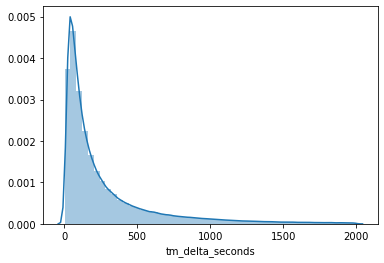

In [26]:
sns.distplot(df[df.tm_delta_seconds < 0.2e4].tm_delta_seconds)
plt.show()

In [27]:
dlt = (df.tm_delta_seconds - df.tm_delta_seconds.mean()).abs()
std = df.tm_delta_seconds.std()

In [28]:
df.tm_delta_seconds.mean() - 3*df.tm_delta_seconds.std(), df.tm_delta_seconds.mean() + 3*df.tm_delta_seconds.std()

(-35409.842447894625, 39269.169907977324)

In [29]:
df.tm_delta_seconds.describe()

count    7.018260e+05
mean     1.929664e+03
std      1.244650e+04
min      3.000000e+00
25%      6.700000e+01
50%      1.570000e+02
75%      4.350000e+02
max      2.043178e+06
Name: tm_delta_seconds, dtype: float64

In [30]:
# disc_col = 'tm_delta_seconds'
disc_col = 'microtasks_per_seconds'

<AxesSubplot:>

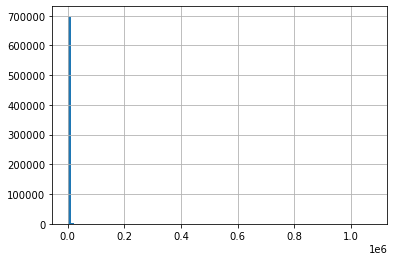

In [31]:
df[disc_col].hist(bins=100)

<AxesSubplot:>

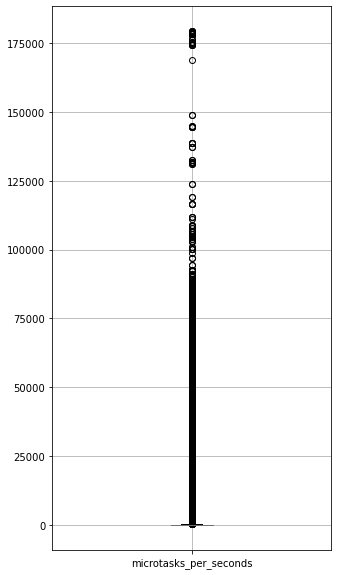

In [32]:
df[df[disc_col] < 0.2e6].boxplot(column=[disc_col], figsize=(5, 10))

Text(0.65, 5000, 'count    699649.000000\nmean        390.526442\nstd        1423.443580\nmin           1.769231\n25%          37.000000\n50%          74.333333\n75%         179.750000\nmax       23017.500000')

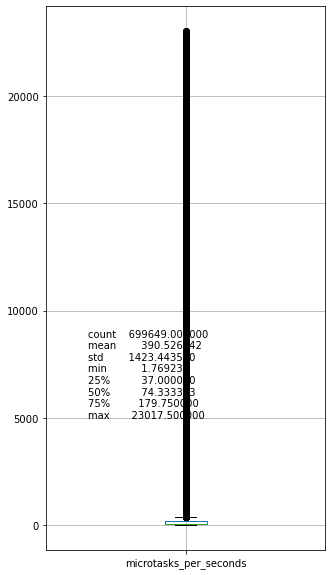

In [33]:
df_tmp = df[df[disc_col] < ((60*60*8) * 0.8)]
df_tmp.boxplot(column=[disc_col], figsize=(5, 10), return_type='axes').text(s=df_tmp[disc_col].describe().to_string(), y=5000, x=.65)


<AxesSubplot:>

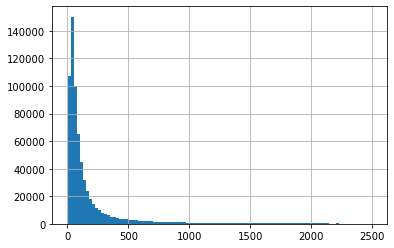

In [34]:
df_tmp[df_tmp[disc_col] < 2500][disc_col].hist(bins=100)

In [35]:
df[disc_col].round().value_counts(normalize=1, bins=1000) * 100


(-1072.155, 1076.154]       93.664812
(1076.154, 2150.308]         2.285182
(2150.308, 3224.462]         0.984290
(3224.462, 4298.616]         0.640757
(4298.616, 5372.77]          0.487158
                              ...    
(932367.672, 933441.826]     0.000000
(616566.396, 617640.55]      0.000000
(615492.242, 616566.396]     0.000000
(614418.088, 615492.242]     0.000000
(536004.846, 537079.0]       0.000000
Name: microtasks_per_seconds, Length: 1000, dtype: float64

<AxesSubplot:>

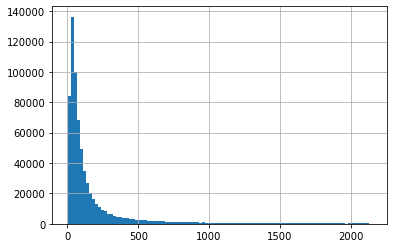

In [36]:
tm_trimmed = 2150.308
df[df[disc_col] < tm_trimmed][disc_col].hist(bins=100)

Text(0.55, 1075.154, 'count    673402.000000\nmean        165.319887\nstd         274.504061\nmin           1.769231\n25%          36.000000\n50%          70.800000\n75%         158.000000\nmax        2150.111111')

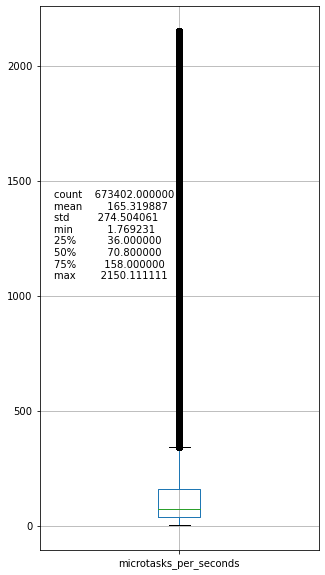

In [37]:
df_trimmed = df[df[disc_col] < tm_trimmed]
ax = df_trimmed.boxplot(column=[disc_col], figsize=(5, 10), return_type='axes')
ax.text(s=df_trimmed[disc_col].describe().to_string(), x=.55, y=tm_trimmed/2)

Text(0.55, 1075.154, 'count    698602.000000\nmean        362.049276\nstd        1217.537366\nmin           1.769231\n25%          37.000000\n50%          74.000000\n75%         178.888889\nmax       16704.000000')

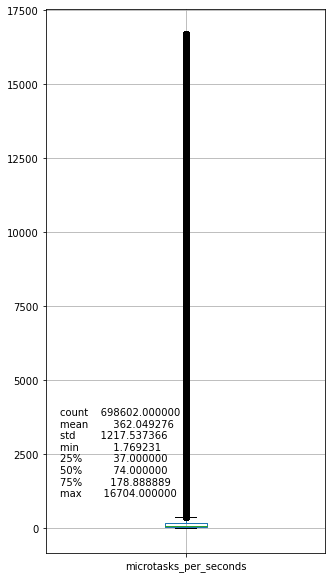

In [38]:
sigma3 = (df[disc_col].mean() - 3*df[disc_col].std(), df[disc_col].mean() + 3*df[disc_col].std())
indxr = df[disc_col].between(*sigma3)
df_trimmed = df[indxr]
# print(df_trimmed[disc_col].describe())
ax = df_trimmed.boxplot(column=[disc_col], figsize=(5, 10), return_type='axes')
ax.text(s=df_trimmed[disc_col].describe().to_string(), x=.55, y=tm_trimmed/2)

In [39]:
df_trimmed[disc_col].value_counts(normalize=1, bins=100) * 100

(-14.934, 168.792]        73.780779
(168.792, 335.814]        11.285253
(335.814, 502.836]         4.086590
(502.836, 669.858]         2.207552
(669.858, 836.881]         1.402086
                            ...    
(15701.866, 15868.888]     0.006155
(15033.777, 15200.799]     0.005583
(12361.42, 12528.442]      0.005153
(16202.933, 16369.955]     0.004294
(14866.755, 15033.777]     0.004008
Name: microtasks_per_seconds, Length: 100, dtype: float64

<AxesSubplot:>

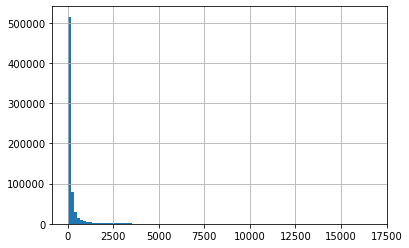

In [40]:
df_trimmed[disc_col].hist(bins=100)

<AxesSubplot:>

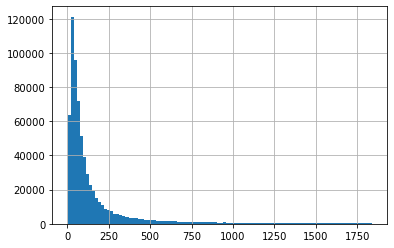

In [41]:
df_bins = df_trimmed[disc_col].value_counts(normalize=1, bins=100).reset_index()
tm_trimmed = df_bins[df_bins[disc_col] > 0.0027].iloc[-1]['index'].right
df_trimmed[df_trimmed[disc_col] < tm_trimmed][disc_col].hist(bins=100)

NameError: name 'params' is not defined

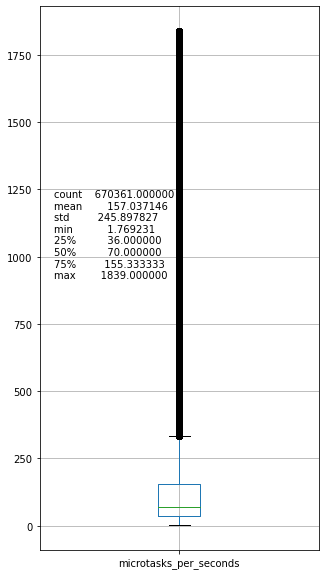

In [42]:
ax = df_trimmed[df_trimmed[disc_col] < tm_trimmed].boxplot(column=[disc_col], figsize=(5,10), return_type='axes')
disc_col_describe = df_trimmed[df_trimmed[disc_col] < tm_trimmed][disc_col].describe()
ax.text(s=disc_col_describe.to_string(), x=.55, y=disc_col_describe['max'] * (1/2))
ax.text(s='\n'.join([f'{params[i]}: {f(x)}' for i,x in enumerate(disc_col_describe[params].values.round())]), x=.55, y=disc_col_describe['max'] * (6/7))

In [ ]:
def boxplot(df, col):
    params = ['max', 'mean', '50%']
    ax = df.boxplot(column=[col], figsize=(5,10), return_type='axes')
    disc_col_describe = df[col].describe()    
    full_describe = disc_col_describe.to_string()
    convert_dt = '\n'.join(
        [f'{params[i]}: {str(timedelta(seconds=x))}' for i,x in enumerate(disc_col_describe[params].values.round())]
    )
    ax.text(s=full_describe, x=.55, y=disc_col_describe['max'] * (1/4))    
    ax.text(s=convert_dt, x=.55, y=disc_col_describe['max'] * (6/7))

In [ ]:
boxplot(df_trimmed[df_trimmed[disc_col] < tm_trimmed], disc_col)

In [ ]:
16704 / (60*60)

In [ ]:
df.assigned_ts.dt.month_name().value_counts().plot.bar()

In [ ]:
# поиск столбцов, где большое кол-во повторов одного и того же значения.


low_rate_lmt = 0.95
low_rate_columns = []

for col in df.columns:
    cnts = df[col].value_counts(dropna=False, normalize=True)
    col_rate = cnts.iloc[0]
    
    if col_rate > low_rate_lmt:
        low_rate_columns.append(col)
        print(f"{col} - {col_rate * 100}")
        print(cnts)
        print()